<a href="https://colab.research.google.com/github/koalalovepabro/Stock-Portfolio-Optimization/blob/main/Test/Stock_Portfolio(momentum_3month).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 사전 종목 선택 방법: 모멘텀(3개월)

# 모멘텀 전략
* 최근에 가장 많이 오른 종목 매수한 후 일정 기간을 보유한 후 파는 전략
* 60 영업일 수익률 순위 보여줌
* https://wikidocs.net/84318

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
!pip install -q install finance-datareader

In [3]:
!pip install pykrx

     |████████████████████████████████| 81 kB 5.8 MB/s 
     |████████████████████████████████| 60 kB 5.6 MB/s 
     |████████████████████████████████| 251 kB 19.8 MB/s 


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import FinanceDataReader as fdr
from pykrx import stock
import datetime

In [5]:
# 오늘 KOSPI&KOSDAQ 종목 전체 불러오기
today = datetime.datetime.today().strftime("%Y%m%d")
kospi = stock.get_market_fundamental_by_ticker(today, market='KOSPI').index
kosdaq = stock.get_market_fundamental_by_ticker(today, market='KOSDAQ').index
stocks = kospi.append(kosdaq)
stocks

Index(['095570', '006840', '027410', '282330', '138930', '001460', '001465',
       '001040', '079160', '00104K',
       ...
       '065510', '243070', '084110', '263920', '145020', '024060', '010240',
       '189980', '037440', '238490'],
      dtype='object', name='티커', length=2391)

## 3개월 모멘텀

In [ ]:
def momentum_3months(stocks): # 종목 list넣으면, 모멘텀 순위 있는 데이터프레임 출력
    df = pd.DataFrame()
    for s in stocks:
      df[s] = fdr.DataReader( s, '2021-01-01')['Close']
    
    # 60 영업일 수익률
    return_df = df.pct_change(60)
    return_df
    
    # 오늘 날짜
    today = datetime.datetime.today().strftime("%Y-%m-%d")
    
    # index는 종목 코드이고 모멘텀 데이터 있는 데이터 프레임으로 만들기
    s = return_df.loc[today]
    momentum_df = pd.DataFrame(s)
    momentum_df.columns = ["모멘텀"]
    
    momentum_df['순위'] = momentum_df['모멘텀'].rank(ascending=False)
    momentum_df = momentum_df.sort_values(by='순위')
    return momentum_df # 모멘텀

In [ ]:
momentum_3months_rank = momentum_3months(stocks)

/tmp/ipykernel_7824/2768697141.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[s] = fdr.DataReader( s, '2021-01-01')['Close']


In [ ]:
momentum_3months_rank

,모멘텀,순위
136510,4.714286,1.0
065440,2.573407,2.0
151860,2.148710,3.0
007390,2.118812,4.0
011000,2.085561,5.0
...,...,...
303530,NaN,NaN
276730,NaN,NaN
363250,NaN,NaN
294570,NaN,NaN


In [ ]:
momentum_3months_rank.head(30)

,모멘텀,순위
136510,4.714286,1.0
065440,2.573407,2.0
151860,2.148710,3.0
007390,2.118812,4.0
011000,2.085561,5.0
102460,2.057971,6.0
291230,2.040268,7.0
130660,1.967626,8.0
069640,1.845336,9.0
043100,1.738095,10.0


In [ ]:
momentum_3months_rank.tail(30)

,모멘텀,순위
003535,-0.472172,2361.0
121850,-0.490637,2362.0
156100,-0.528764,2363.0
139670,-0.532200,2364.0
032860,-0.532847,2365.0
007700,-0.546939,2366.0
064510,-0.650794,2367.0
221610,-0.703430,2368.0
383220,NaN,NaN
383800,NaN,NaN


## 미리 csv 파일로 저장해 둔 모멘텀 3개월 결과 불러오기

In [6]:
momentum_3months_rank = pd.read_csv('momentum_3months_rank.csv')
momentum_3months_rank

,Unnamed: 0,모멘텀,순위
0,136510,4.714286,1.0
1,065440,2.573407,2.0
2,151860,2.148710,3.0
3,007390,2.118812,4.0
4,011000,2.085561,5.0
...,...,...,...
2385,303530,NaN,NaN
2386,276730,NaN,NaN
2387,363250,NaN,NaN
2388,294570,NaN,NaN


In [7]:
momentum_3months_rank.index = momentum_3months_rank['Unnamed: 0']
momentum_3months_rank

,Unnamed: 0,모멘텀,순위
Unnamed: 0,,,
136510,136510,4.714286,1.0
065440,065440,2.573407,2.0
151860,151860,2.148710,3.0
007390,007390,2.118812,4.0
011000,011000,2.085561,5.0
...,...,...,...
303530,303530,NaN,NaN
276730,276730,NaN,NaN
363250,363250,NaN,NaN


In [8]:
momentum_3months_rank = momentum_3months_rank.drop('Unnamed: 0', axis=1)
momentum_3months_rank

,모멘텀,순위
Unnamed: 0,,
136510,4.714286,1.0
065440,2.573407,2.0
151860,2.148710,3.0
007390,2.118812,4.0
011000,2.085561,5.0
...,...,...
303530,NaN,NaN
276730,NaN,NaN
363250,NaN,NaN


### 급등주 종목 저장

In [9]:
import requests

In [10]:
assets = np.array(momentum_3months_rank.index[:30])
assets

array(['136510', '065440', '151860', '007390', '011000', '102460',
       '291230', '130660', '069640', '043100', '014285', '189860',
       '000157', '196700', '024740', '003925', '109080', '317530',
       '001440', '049480', '289220', '032820', '205500', '191410',
       '185490', '016920', '189330', '006660', '041510', '171090'],
      dtype=object)

In [11]:
len(assets)

30

### 3년치 주가 데이터 가져오기

In [12]:
# 종목별 종가 가져오기
from datetime import datetime

#시작일
start_date = '2018-07-19'

# today = datetime.today().strftime('%Y-%m-%d')
end_date = '2021-07-19'

# 각 주식의 일별 종가 데이터를 저장할 데이터 프레임을 생성
#Create a dataframe to store the adjusted close price of the stocks
df = pd.DataFrame()

# FinanceDataReader로 각 종목의 종가데이터 불러오기
for stock in assets:
  df[stock] = fdr.DataReader(stock, start_date, end_date)['Close']
df

,136510,065440,151860,007390,011000,102460,291230,130660,069640,043100,014285,189860,000157,196700,024740,003925,109080,317530,001440,049480,289220,032820,205500,191410,185490,016920,189330,006660,041510,171090
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-07-19,10550,1597,3765,8097,4898,20695,NaN,3395,8200,2356,7490,4575,58687,2385,1555,208500,6950,NaN,1140,2425,NaN,1515,6060,5880,17066,1785,30500,10750,40000,9899
2018-07-20,10500,1656,3750,7381,4840,20695,NaN,3380,8250,2646,7380,4400,58451,2350,1550,209000,6800,NaN,1130,2425,NaN,1470,5990,5880,16648,1785,30200,10500,38800,9866
2018-07-23,10450,1585,3650,6273,4505,19616,NaN,3335,8190,2486,6760,4080,58844,2295,1440,209500,6550,NaN,1095,2475,NaN,1405,5870,5850,15170,1800,30000,10650,37600,9665
2018-07-24,10900,1614,3730,6541,4587,19420,NaN,3465,8270,2377,7170,4400,58451,2298,1460,209500,6640,NaN,1155,2450,NaN,1550,5890,5820,15170,1790,30300,10600,38250,9665
2018-07-25,10850,1568,3650,6025,4447,19028,NaN,3465,8280,2369,7170,4250,57980,2298,1400,206000,6470,NaN,1135,2350,NaN,1450,5860,5800,14373,1725,30300,10600,38100,9498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-13,39100,6060,22300,29200,46050,69000,7170.0,15250,12400,1685,22850,11450,148500,6680,4580,399000,28650,20300.0,2840,6320,76000.0,2780,5710,5420,41000,5650,81800,26300,65400,29800
2021-07-14,40100,6340,20950,30800,47100,69500,7370.0,14750,14000,1770,29700,10800,150000,6510,5300,393000,26350,19550.0,2845,6700,82600.0,2780,5950,5080,43350,5800,85000,26500,65400,28850
2021-07-15,37600,6470,20950,30850,49800,66900,7980.0,15500,13100,1830,34500,11100,154000,6950,5400,390000,25500,20400.0,2815,6650,82600.0,3115,7200,5280,43300,5850,84700,26700,64400,28600


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 740 entries, 2018-07-19 to 2021-07-19
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   136510  740 non-null    int64  
 1   065440  740 non-null    int64  
 2   151860  740 non-null    int64  
 3   007390  740 non-null    int64  
 4   011000  740 non-null    int64  
 5   102460  740 non-null    int64  
 6   291230  701 non-null    float64
 7   130660  740 non-null    int64  
 8   069640  740 non-null    int64  
 9   043100  740 non-null    int64  
 10  014285  740 non-null    int64  
 11  189860  740 non-null    int64  
 12  000157  740 non-null    int64  
 13  196700  740 non-null    int64  
 14  024740  740 non-null    int64  
 15  003925  740 non-null    int64  
 16  109080  740 non-null    int64  
 17  317530  428 non-null    float64
 18  001440  740 non-null    int64  
 19  049480  740 non-null    int64  
 20  289220  82 non-null     float64
 21  032820  740 non-null

In [14]:
df.isnull().sum()

136510      0
065440      0
151860      0
007390      0
011000      0
102460      0
291230     39
130660      0
069640      0
043100      0
014285      0
189860      0
000157      0
196700      0
024740      0
003925      0
109080      0
317530    312
001440      0
049480      0
289220    658
032820      0
205500      0
191410      0
185490      0
016920      0
189330      0
006660      0
041510      0
171090      0
dtype: int64

In [15]:
# 결측값 있는 열 삭제 
df2 = df.dropna(axis = 1)
df2

,136510,065440,151860,007390,011000,102460,130660,069640,043100,014285,189860,000157,196700,024740,003925,109080,001440,049480,032820,205500,191410,185490,016920,189330,006660,041510,171090
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-07-19,10550,1597,3765,8097,4898,20695,3395,8200,2356,7490,4575,58687,2385,1555,208500,6950,1140,2425,1515,6060,5880,17066,1785,30500,10750,40000,9899
2018-07-20,10500,1656,3750,7381,4840,20695,3380,8250,2646,7380,4400,58451,2350,1550,209000,6800,1130,2425,1470,5990,5880,16648,1785,30200,10500,38800,9866
2018-07-23,10450,1585,3650,6273,4505,19616,3335,8190,2486,6760,4080,58844,2295,1440,209500,6550,1095,2475,1405,5870,5850,15170,1800,30000,10650,37600,9665
2018-07-24,10900,1614,3730,6541,4587,19420,3465,8270,2377,7170,4400,58451,2298,1460,209500,6640,1155,2450,1550,5890,5820,15170,1790,30300,10600,38250,9665
2018-07-25,10850,1568,3650,6025,4447,19028,3465,8280,2369,7170,4250,57980,2298,1400,206000,6470,1135,2350,1450,5860,5800,14373,1725,30300,10600,38100,9498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-13,39100,6060,22300,29200,46050,69000,15250,12400,1685,22850,11450,148500,6680,4580,399000,28650,2840,6320,2780,5710,5420,41000,5650,81800,26300,65400,29800
2021-07-14,40100,6340,20950,30800,47100,69500,14750,14000,1770,29700,10800,150000,6510,5300,393000,26350,2845,6700,2780,5950,5080,43350,5800,85000,26500,65400,28850
2021-07-15,37600,6470,20950,30850,49800,66900,15500,13100,1830,34500,11100,154000,6950,5400,390000,25500,2815,6650,3115,7200,5280,43300,5850,84700,26700,64400,28600


In [16]:
!pip install PyPortfolioOpt

     |████████████████████████████████| 60 kB 4.7 MB/s 
     |████████████████████████████████| 2.7 MB 31.0 MB/s 
  Attempting uninstall: cvxpy
    Found existing installation: cvxpy 1.0.31
    Uninstalling cvxpy-1.0.31:
      Successfully uninstalled cvxpy-1.0.31


In [17]:
# Optimize the portfolio
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [18]:
# Calculate the expected annualized returns
# 복리 연평균 수익률
# return (1 + returns).prod() ** (frequency / returns.count()) - 1
mu = expected_returns.mean_historical_return(df2) 

# Calculate the annualized sample covariance matrix of the daily asset returns
S = risk_models.sample_cov(df2)

In [19]:
mu

136510    0.549413
065440    0.638104
151860    0.789651
007390    0.589228
011000    1.232125
102460    0.469596
130660    0.694829
069640    0.154612
043100   -0.115291
014285    0.738276
189860    0.361153
000157    0.369260
196700    0.365017
024740    0.498344
003925    0.226030
109080    0.538838
001440    0.351069
049480    0.436163
032820    0.268770
205500    0.037456
191410   -0.007595
185490    0.365521
016920    0.472299
189330    0.422897
006660    0.367212
041510    0.163103
171090    0.441020
dtype: float64

In [20]:
len(mu)

27

In [21]:
S

,136510,065440,151860,007390,011000,102460,130660,069640,043100,014285,189860,000157,196700,024740,003925,109080,001440,049480,032820,205500,191410,185490,016920,189330,006660,041510,171090
136510,0.675205,0.106758,0.092655,0.090744,0.029052,0.078838,0.072076,0.060459,0.038086,0.066575,0.127165,0.122411,0.190424,0.035409,0.054658,0.065877,0.128246,0.122322,0.104662,0.059663,0.085801,0.086125,0.076935,-0.017147,0.023302,0.071345,0.106117
065440,0.106758,0.480319,0.108229,0.108589,0.068350,0.157315,0.052769,0.100820,0.023303,0.140956,0.095615,0.045397,0.090799,0.138331,0.047990,0.094200,0.086336,0.208405,0.117176,0.068439,0.097551,0.163619,0.104069,-0.024787,0.033877,0.085759,0.119450
151860,0.092655,0.108229,0.349486,0.074487,0.104861,0.108324,0.045174,0.084409,0.026822,0.061766,0.066120,-0.007268,0.088815,0.041447,0.067232,0.114730,0.074812,0.116515,0.064776,0.063627,0.087054,0.102851,0.058981,-0.000340,0.051384,0.070356,0.114379
007390,0.090744,0.108589,0.074487,0.734352,0.106834,0.151970,0.021664,0.084953,0.020454,0.054570,0.044395,0.027780,0.048732,0.021738,0.039716,0.085897,0.081541,0.096402,0.065345,0.050354,0.066446,0.204781,0.094291,0.057154,0.032580,0.078426,0.086537
011000,0.029052,0.068350,0.104861,0.106834,1.096236,0.115050,0.020800,0.036441,0.059471,0.005302,0.010746,-0.002583,0.067710,0.007920,-0.001025,0.047163,0.030084,0.060167,0.046922,0.059275,-0.013173,0.135283,0.077694,0.000759,0.031135,-0.012016,0.048507
102460,0.078838,0.157315,0.108324,0.151970,0.115050,0.459622,0.083718,0.071702,0.026385,0.133746,0.121345,0.103200,0.097154,0.110383,0.078726,0.080928,0.112272,0.136714,0.122704,0.108779,0.089123,0.232942,0.098485,0.015964,0.039375,0.098290,0.076611
130660,0.072076,0.052769,0.045174,0.021664,0.020800,0.083718,0.245324,0.032480,0.016768,0.059809,0.146094,0.122768,0.065026,-0.000218,0.018985,0.034665,0.065574,0.053243,0.127296,0.059862,0.028948,0.045509,0.019598,-0.004740,0.013337,0.024477,0.051155
069640,0.060459,0.100820,0.084409,0.084953,0.036441,0.071702,0.032480,0.277197,0.022659,0.087219,0.068514,0.022444,0.053183,0.054875,0.025023,0.082499,0.064677,0.104099,0.062219,0.038618,0.069304,0.069713,0.045760,-0.011677,0.037078,0.058473,0.079596
043100,0.038086,0.023303,0.026822,0.020454,0.059471,0.026385,0.016768,0.022659,0.332094,-0.000841,0.021130,0.009947,0.036678,0.012470,-0.006508,0.029064,0.001249,0.037876,0.021782,0.034468,0.022637,0.078229,0.059813,-0.015638,0.036522,0.013553,0.038472
014285,0.066575,0.140956,0.061766,0.054570,0.005302,0.133746,0.059809,0.087219,-0.000841,0.847175,0.078115,0.100507,0.074311,0.104443,0.086089,0.078897,0.047293,0.123535,0.095560,0.082369,0.055052,0.086409,0.048044,0.045613,0.030922,0.051145,0.076868


In [22]:
len(S)

27

In [23]:
S.shape

(27, 27)

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


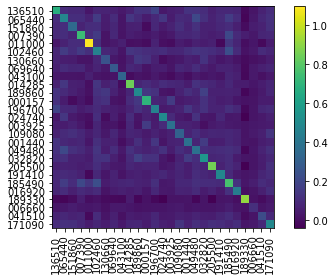

In [24]:
# 수익률의 공분산
from pypfopt import plotting

plotting.plot_covariance(S)

# 포트폴리오 최적화 ( Max.샤프비율 )

In [38]:
# Optimize for the maximal Sharpe ratio
# 💛데이터셋이 너무 많으면, ef.max_sharpe()에서 에러남 -> solver를 SCS로 바꿔줌
# Robert says: 100개 이하로 종목을 추린 후에 실행시키기를 추천함 !
ef = EfficientFrontier(mu, S, solver="SCS")  # Create the Efficient Frontier Object

# Maximize the Sharpe ratio, and get the raw weights
# max_sharpe()-> optimizes for maximal Sharpe ratio (a.k.a the tangency portfolio)
# 결과값 : CML(자본시장선)과 효율적 투자선(efficient frontier)의 접점에 있는 포트폴리오
weights = ef.max_sharpe()

# clean_weights()-> rounds the weights and clips near-zeros.
# weights < 0.0001 => clean_weights = 0
# cleaned_weights => 소숫점 5자리까지 표시
cleaned_weights = ef.clean_weights()
print(cleaned_weights)

# calculates the expected return, volatility and Sharpe ratio for the optimized portfolio.
ef.portfolio_performance(verbose=True)

OrderedDict([('136510', 0.0187), ('065440', 0.01356), ('151860', 0.12823), ('007390', 0.02832), ('011000', 0.10512), ('102460', 0.0), ('130660', 0.26898), ('069640', 0.0), ('043100', 0.0), ('014285', 0.04571), ('189860', 0.0), ('000157', 0.0), ('196700', 0.0), ('024740', 0.07838), ('003925', 0.0), ('109080', 0.03595), ('001440', 0.0), ('049480', 0.0), ('032820', 0.0), ('205500', 0.0), ('191410', 0.0), ('185490', 0.0), ('016920', 0.03855), ('189330', 0.05146), ('006660', 0.18705), ('041510', 0.0), ('171090', 0.0)])
Expected annual return: 65.4%
Annual volatility: 28.0%
Sharpe Ratio: 2.26


(0.6541152088027182, 0.2803010200250025, 2.262265077544691)

In [27]:
weights

OrderedDict([('136510', 0.0187022898297463),
             ('065440', 0.0135583099932837),
             ('151860', 0.12823298826338),
             ('007390', 0.0283174559533919),
             ('011000', 0.105116853696344),
             ('102460', -3.60882508e-08),
             ('130660', 0.2689839263057312),
             ('069640', 9.27885379e-08),
             ('043100', 2.080542099e-07),
             ('014285', 0.0457098496893204),
             ('189860', 5.0955761e-09),
             ('000157', 2.82455816e-08),
             ('196700', -1.350386325e-07),
             ('024740', 0.07837883146762),
             ('003925', 7.30258521e-08),
             ('109080', 0.03594634549751),
             ('001440', -3.94572135e-08),
             ('049480', -3.86543369e-08),
             ('032820', 6.29457259e-08),
             ('205500', -2.57002113e-08),
             ('191410', 1.423659297e-07),
             ('185490', 7.1710049e-08),
             ('016920', 0.0385457263546136),
             ('189

In [28]:
len(weights)

27

In [29]:
cleaned_weights

OrderedDict([('136510', 0.0187),
             ('065440', 0.01356),
             ('151860', 0.12823),
             ('007390', 0.02832),
             ('011000', 0.10512),
             ('102460', 0.0),
             ('130660', 0.26898),
             ('069640', 0.0),
             ('043100', 0.0),
             ('014285', 0.04571),
             ('189860', 0.0),
             ('000157', 0.0),
             ('196700', 0.0),
             ('024740', 0.07838),
             ('003925', 0.0),
             ('109080', 0.03595),
             ('001440', 0.0),
             ('049480', 0.0),
             ('032820', 0.0),
             ('205500', 0.0),
             ('191410', 0.0),
             ('185490', 0.0),
             ('016920', 0.03855),
             ('189330', 0.05146),
             ('006660', 0.18705),
             ('041510', 0.0),
             ('171090', 0.0)])

In [30]:
len(cleaned_weights)

27

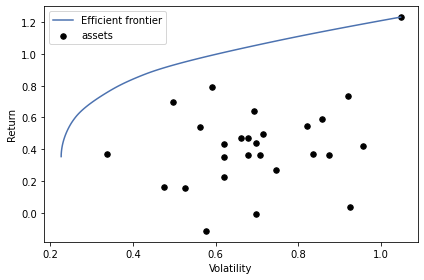

In [39]:
# 효율적 투자선과 각 종목의 수익률 & 변동성
import matplotlib.pyplot as plt

ef = EfficientFrontier(mu, S, solver='SCS')

fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=True)
plt.show()

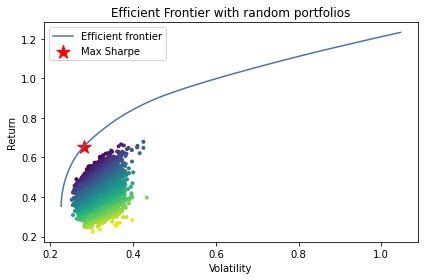

In [40]:
# Show Efficient Frontier
fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)

# Minimize.volatility
# ef.min_volatility()
# ret_minv, std_minv, _ = ef.portfolio_performance()
# ax.scatter(std_minv, ret_minv, marker="*", s=100, c="b", label="Min Volatility")

# Find the tangency portfolio
ef.max_sharpe()
ret_tangent, std_tangent, _ = ef.portfolio_performance()  # 기대수익률 , Risk(변동성)
ax.scatter(std_tangent, ret_tangent, marker="*", s=200, c="r", label="Max Sharpe")

# Generate random portfolios
n_samples = 20000
w = np.random.dirichlet(np.ones(len(mu)), n_samples) # 난수로 20000세트의 투자비중 만들기
rets = w.dot(mu)                                     # 기대수익률
stds = np.sqrt(np.diag(w @ S @ w.T))                 # Risk(변동성)
sharpes = rets / stds                                # 샤프비율

ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")

# Output
ax.set_title("Efficient Frontier with random portfolios")
ax.legend()
plt.tight_layout()
plt.savefig("ef_scatter.png", dpi=200)
plt.show()

In [41]:
# Max.Sharpe Ratio로 최적화한 포트폴리오의 수익률과 변동성, 샤프비율
ef.portfolio_performance(verbose=True)

Expected annual return: 65.4%
Annual volatility: 28.0%
Sharpe Ratio: 2.26


(0.6541152088027182, 0.2803010200250025, 2.262265077544691)

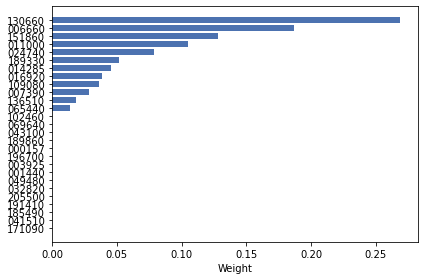

In [44]:
# 종목별 투자비중
plotting.plot_weights(weights, ax=None)

In [42]:
!pip install pulp

In [45]:
# Get the discrete allocation of each sharpe per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

# 투자금액 (단위: KRW)
portfolio_val = 15000000

latest_prices = get_latest_prices(df2)

weights = cleaned_weights

da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=portfolio_val)

allocation, leftover = da.lp_portfolio(verbose=False)


# print("{}: allocated {:.3f}, desired {:.3f}".format(ticker, allocation_weight, weight)
# print("Allocation has RMSE: {:.3f}".format(rmse))

print('Discrete Allocaion: ', allocation)
print('Funds Remaining: ', leftover, ' KRW')
# print('Allocation has RMSE: {:.3f}'.format(rmse))

# 평균 제곱근 오차(Root Mean Square Error; RMSE)
# 포트폴리오의 종목별 비중과 실제 할당된 비중 간의 차이

rmse = da._allocation_rmse_error(verbose=False)
# print('Allocation has RMSE: {:.5f}'.format(rmse))

Discrete Allocaion:  {'136510': 7, '065440': 30, '151860': 93, '007390': 13, '011000': 31, '130660': 253, '014285': 18, '024740': 231, '109080': 22, '016920': 105, '189330': 9, '006660': 104}
Funds Remaining:  3660.0  KRW
Allocation has RMSE: 0.000


In [46]:
allocation

{'006660': 104,
 '007390': 13,
 '011000': 31,
 '014285': 18,
 '016920': 105,
 '024740': 231,
 '065440': 30,
 '109080': 22,
 '130660': 253,
 '136510': 7,
 '151860': 93,
 '189330': 9}

In [47]:
len(allocation)

12

In [48]:
# Get the discrete allocation values
discrete_allocation_list = []
for symbol in allocation:
  discrete_allocation_list.append(allocation.get(symbol))

In [49]:
discrete_allocation_list

[7, 30, 93, 13, 31, 253, 18, 231, 22, 105, 9, 104]

In [51]:
# portfolio_df['Company_name'] = company_name
portfolio_df['company_Ticker'] = allocation
portfolio_df['Discrete_val_'+str(portfolio_val)] = discrete_allocation_list

In [52]:
portfolio_df

,company_Ticker,Discrete_val_15000000
136510,136510,7
065440,065440,30
151860,151860,93
007390,007390,13
011000,011000,31
130660,130660,253
014285,014285,18
024740,024740,231
109080,109080,22
016920,016920,105


In [53]:
# Sort by allocation & Show the portfolio
portfolio_df_sorted = portfolio_df.sort_values('Discrete_val_'+str(portfolio_val), ascending = False)
portfolio_df_sorted = portfolio_df_sorted.reset_index(drop=True)
portfolio_df_sorted

,company_Ticker,Discrete_val_15000000
0,130660,253
1,024740,231
2,016920,105
3,006660,104
4,151860,93
5,011000,31
6,065440,30
7,109080,22
8,014285,18
9,007390,13


In [55]:
print('----- 3 months momentum portfolio performance -----')

# Show Funds Remaining
print('Funds Remaining: ', leftover, ' KRW')

# Show Portfolio performance
ef.portfolio_performance(verbose=True)

# Show RMSE
# print('Allocation has RMSE: {:.3f}'.format(rmse))

----- 3 months momentum portfolio performance -----
Funds Remaining:  3660.0  KRW
Expected annual return: 65.4%
Annual volatility: 28.0%
Sharpe Ratio: 2.26


(0.6541152088027182, 0.2803010200250025, 2.262265077544691)

## 포트폴리오의 수익률과 변동성을 벤치마크지수(KOSPI)와 비교

In [56]:
df2

,136510,065440,151860,007390,011000,102460,130660,069640,043100,014285,189860,000157,196700,024740,003925,109080,001440,049480,032820,205500,191410,185490,016920,189330,006660,041510,171090
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-07-19,10550,1597,3765,8097,4898,20695,3395,8200,2356,7490,4575,58687,2385,1555,208500,6950,1140,2425,1515,6060,5880,17066,1785,30500,10750,40000,9899
2018-07-20,10500,1656,3750,7381,4840,20695,3380,8250,2646,7380,4400,58451,2350,1550,209000,6800,1130,2425,1470,5990,5880,16648,1785,30200,10500,38800,9866
2018-07-23,10450,1585,3650,6273,4505,19616,3335,8190,2486,6760,4080,58844,2295,1440,209500,6550,1095,2475,1405,5870,5850,15170,1800,30000,10650,37600,9665
2018-07-24,10900,1614,3730,6541,4587,19420,3465,8270,2377,7170,4400,58451,2298,1460,209500,6640,1155,2450,1550,5890,5820,15170,1790,30300,10600,38250,9665
2018-07-25,10850,1568,3650,6025,4447,19028,3465,8280,2369,7170,4250,57980,2298,1400,206000,6470,1135,2350,1450,5860,5800,14373,1725,30300,10600,38100,9498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-13,39100,6060,22300,29200,46050,69000,15250,12400,1685,22850,11450,148500,6680,4580,399000,28650,2840,6320,2780,5710,5420,41000,5650,81800,26300,65400,29800
2021-07-14,40100,6340,20950,30800,47100,69500,14750,14000,1770,29700,10800,150000,6510,5300,393000,26350,2845,6700,2780,5950,5080,43350,5800,85000,26500,65400,28850
2021-07-15,37600,6470,20950,30850,49800,66900,15500,13100,1830,34500,11100,154000,6950,5400,390000,25500,2815,6650,3115,7200,5280,43300,5850,84700,26700,64400,28600


In [57]:
cleaned_weights

OrderedDict([('136510', 0.0187),
             ('065440', 0.01356),
             ('151860', 0.12823),
             ('007390', 0.02832),
             ('011000', 0.10512),
             ('102460', 0.0),
             ('130660', 0.26898),
             ('069640', 0.0),
             ('043100', 0.0),
             ('014285', 0.04571),
             ('189860', 0.0),
             ('000157', 0.0),
             ('196700', 0.0),
             ('024740', 0.07838),
             ('003925', 0.0),
             ('109080', 0.03595),
             ('001440', 0.0),
             ('049480', 0.0),
             ('032820', 0.0),
             ('205500', 0.0),
             ('191410', 0.0),
             ('185490', 0.0),
             ('016920', 0.03855),
             ('189330', 0.05146),
             ('006660', 0.18705),
             ('041510', 0.0),
             ('171090', 0.0)])

In [58]:
len(cleaned_weights)

27

In [59]:
# 1씩 더하기
cleaned_weights_p1 = dict(zip(cleaned_weights.keys(),map(lambda x:x[1]+1,cleaned_weights.items())))
cleaned_weights_p1

{'000157': 1.0,
 '001440': 1.0,
 '003925': 1.0,
 '006660': 1.18705,
 '007390': 1.02832,
 '011000': 1.10512,
 '014285': 1.04571,
 '016920': 1.03855,
 '024740': 1.0783800000000001,
 '032820': 1.0,
 '041510': 1.0,
 '043100': 1.0,
 '049480': 1.0,
 '065440': 1.01356,
 '069640': 1.0,
 '102460': 1.0,
 '109080': 1.03595,
 '130660': 1.26898,
 '136510': 1.0187,
 '151860': 1.12823,
 '171090': 1.0,
 '185490': 1.0,
 '189330': 1.05146,
 '189860': 1.0,
 '191410': 1.0,
 '196700': 1.0,
 '205500': 1.0}

In [60]:
# 각 일자별, 종목별 종가에 해당 weights를 곱해주기
for i, weight in cleaned_weights_p1.items():
    df2[i] = df2[i]*weight

In [61]:
df2

,136510,065440,151860,007390,011000,102460,130660,069640,043100,014285,189860,000157,196700,024740,003925,109080,001440,049480,032820,205500,191410,185490,016920,189330,006660,041510,171090
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-07-19,10747.285,1618.65532,4247.78595,8326.30704,5412.87776,20695.0,4308.1871,8200.0,2356.0,7832.3679,4575.0,58687.0,2385.0,1676.8809,208500.0,7199.8525,1140.0,2425.0,1515.0,6060.0,5880.0,17066.0,1853.81175,32069.530,12760.7875,40000.0,9899.0
2018-07-20,10696.350,1678.45536,4230.86250,7590.02992,5348.78080,20695.0,4289.1524,8250.0,2646.0,7717.3398,4400.0,58451.0,2350.0,1671.4890,209000.0,7044.4600,1130.0,2425.0,1470.0,5990.0,5880.0,16648.0,1853.81175,31754.092,12464.0250,38800.0,9866.0
2018-07-23,10645.415,1606.49260,4118.03950,6450.65136,4978.56560,19616.0,4232.0483,8190.0,2486.0,7068.9996,4080.0,58844.0,2295.0,1552.8672,209500.0,6785.4725,1095.0,2475.0,1405.0,5870.0,5850.0,15170.0,1869.39000,31543.800,12642.0825,37600.0,9665.0
2018-07-24,11103.830,1635.88584,4208.29790,6726.24112,5069.18544,19420.0,4397.0157,8270.0,2377.0,7497.7407,4400.0,58451.0,2298.0,1574.4348,209500.0,6878.7080,1155.0,2450.0,1550.0,5890.0,5820.0,15170.0,1859.00450,31859.238,12582.7300,38250.0,9665.0
2018-07-25,11052.895,1589.26208,4118.03950,6195.62800,4914.46864,19028.0,4397.0157,8280.0,2369.0,7497.7407,4250.0,57980.0,2298.0,1509.7320,206000.0,6702.5965,1135.0,2350.0,1450.0,5860.0,5800.0,14373.0,1791.49875,31859.238,12582.7300,38100.0,9498.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-13,39831.170,6142.17360,25159.52900,30026.94400,50890.77600,69000.0,19351.9450,12400.0,1685.0,23894.4735,11450.0,148500.0,6680.0,4938.9804,399000.0,29679.9675,2840.0,6320.0,2780.0,5710.0,5420.0,41000.0,5867.80750,86009.428,31219.4150,65400.0,29800.0
2021-07-14,40849.870,6425.97040,23636.41850,31672.25600,52051.15200,69500.0,18717.4550,14000.0,1770.0,31057.5870,10800.0,150000.0,6510.0,5715.4140,393000.0,27297.2825,2845.0,6700.0,2780.0,5950.0,5080.0,43350.0,6023.59000,89374.100,31456.8250,65400.0,28850.0
2021-07-15,38303.120,6557.73320,23636.41850,31723.67200,55034.97600,66900.0,19669.1900,13100.0,1830.0,36076.9950,11100.0,154000.0,6950.0,5823.2520,390000.0,26416.7250,2815.0,6650.0,3115.0,7200.0,5280.0,43300.0,6075.51750,89058.662,31694.2350,64400.0,28600.0


In [62]:
# 일자별 종목의 (종가*비중) 합계를 Port열에 저장
df2['Port'] = df2.sum(axis = 1)
df2

,136510,065440,151860,007390,011000,102460,130660,069640,043100,014285,189860,000157,196700,024740,003925,109080,001440,049480,032820,205500,191410,185490,016920,189330,006660,041510,171090,Port
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-07-19,10747.285,1618.65532,4247.78595,8326.30704,5412.87776,20695.0,4308.1871,8200.0,2356.0,7832.3679,4575.0,58687.0,2385.0,1676.8809,208500.0,7199.8525,1140.0,2425.0,1515.0,6060.0,5880.0,17066.0,1853.81175,32069.530,12760.7875,40000.0,9899.0,4.874373e+05
2018-07-20,10696.350,1678.45536,4230.86250,7590.02992,5348.78080,20695.0,4289.1524,8250.0,2646.0,7717.3398,4400.0,58451.0,2350.0,1671.4890,209000.0,7044.4600,1130.0,2425.0,1470.0,5990.0,5880.0,16648.0,1853.81175,31754.092,12464.0250,38800.0,9866.0,4.843398e+05
2018-07-23,10645.415,1606.49260,4118.03950,6450.65136,4978.56560,19616.0,4232.0483,8190.0,2486.0,7068.9996,4080.0,58844.0,2295.0,1552.8672,209500.0,6785.4725,1095.0,2475.0,1405.0,5870.0,5850.0,15170.0,1869.39000,31543.800,12642.0825,37600.0,9665.0,4.776348e+05
2018-07-24,11103.830,1635.88584,4208.29790,6726.24112,5069.18544,19420.0,4397.0157,8270.0,2377.0,7497.7407,4400.0,58451.0,2298.0,1574.4348,209500.0,6878.7080,1155.0,2450.0,1550.0,5890.0,5820.0,15170.0,1859.00450,31859.238,12582.7300,38250.0,9665.0,4.800583e+05
2018-07-25,11052.895,1589.26208,4118.03950,6195.62800,4914.46864,19028.0,4397.0157,8280.0,2369.0,7497.7407,4250.0,57980.0,2298.0,1509.7320,206000.0,6702.5965,1135.0,2350.0,1450.0,5860.0,5800.0,14373.0,1791.49875,31859.238,12582.7300,38100.0,9498.0,4.729818e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-13,39831.170,6142.17360,25159.52900,30026.94400,50890.77600,69000.0,19351.9450,12400.0,1685.0,23894.4735,11450.0,148500.0,6680.0,4938.9804,399000.0,29679.9675,2840.0,6320.0,2780.0,5710.0,5420.0,41000.0,5867.80750,86009.428,31219.4150,65400.0,29800.0,1.160998e+06
2021-07-14,40849.870,6425.97040,23636.41850,31672.25600,52051.15200,69500.0,18717.4550,14000.0,1770.0,31057.5870,10800.0,150000.0,6510.0,5715.4140,393000.0,27297.2825,2845.0,6700.0,2780.0,5950.0,5080.0,43350.0,6023.59000,89374.100,31456.8250,65400.0,28850.0,1.170813e+06
2021-07-15,38303.120,6557.73320,23636.41850,31723.67200,55034.97600,66900.0,19669.1900,13100.0,1830.0,36076.9950,11100.0,154000.0,6950.0,5823.2520,390000.0,26416.7250,2815.0,6650.0,3115.0,7200.0,5280.0,43300.0,6075.51750,89058.662,31694.2350,64400.0,28600.0,1.175310e+06


In [63]:
# 일자별 종가의 전일대비 변동률(수익률)을 portfolio라는 데이터프레임으로 저장
portfolio = df2[['Port']].pct_change()
portfolio

,Port
Date,
2018-07-19,NaN
2018-07-20,-0.006355
2018-07-23,-0.013844
2018-07-24,0.005074
2018-07-25,-0.014741
...,...
2021-07-13,-0.000820
2021-07-14,0.008454
2021-07-15,0.003841


In [64]:
# 코스피지수 불러오기
kospi = fdr.DataReader('KS11', start_date, end_date)[['Close']]
kospi

,Close
Date,
2018-07-19,2282.29
2018-07-20,2289.19
2018-07-23,2269.31
2018-07-24,2280.20
2018-07-25,2273.03
...,...
2021-07-13,3271.38
2021-07-14,3264.81
2021-07-15,3286.22


In [65]:
# 코스피지수의 변동률(수익률) 구하기
# 변동률(수익률) = (당일가격-전일가격) / 전일가격
# 7/20의 변동률(수익률) = (7/20 가격-7-19 가격) / 7/19 가격
kospi_pct = kospi.pct_change()
kospi_pct

,Close
Date,
2018-07-19,NaN
2018-07-20,0.003023
2018-07-23,-0.008684
2018-07-24,0.004799
2018-07-25,-0.003144
...,...
2021-07-13,0.007673
2021-07-14,-0.002008
2021-07-15,0.006558


In [66]:
# 코스피와 포트폴리오 합치기
result = kospi_pct.join(portfolio)
result

,Close,Port
Date,,
2018-07-19,NaN,NaN
2018-07-20,0.003023,-0.006355
2018-07-23,-0.008684,-0.013844
2018-07-24,0.004799,0.005074
2018-07-25,-0.003144,-0.014741
...,...,...
2021-07-13,0.007673,-0.000820
2021-07-14,-0.002008,0.008454
2021-07-15,0.006558,0.003841


In [67]:
# 1열을 0으로 
result.iloc[0] = 0
result

,Close,Port
Date,,
2018-07-19,0.000000,0.000000
2018-07-20,0.003023,-0.006355
2018-07-23,-0.008684,-0.013844
2018-07-24,0.004799,0.005074
2018-07-25,-0.003144,-0.014741
...,...,...
2021-07-13,0.007673,-0.000820
2021-07-14,-0.002008,0.008454
2021-07-15,0.006558,0.003841


In [68]:
# 열 이름 변경
result.columns = ['KOSPI', 'PORTFOLIO']
result

,KOSPI,PORTFOLIO
Date,,
2018-07-19,0.000000,0.000000
2018-07-20,0.003023,-0.006355
2018-07-23,-0.008684,-0.013844
2018-07-24,0.004799,0.005074
2018-07-25,-0.003144,-0.014741
...,...,...
2021-07-13,0.007673,-0.000820
2021-07-14,-0.002008,0.008454
2021-07-15,0.006558,0.003841


In [69]:
# 1에서 시작해서, 전일대비 변동률(수익률)을 적용하여 수치화하기
wealth = (1+result).cumprod()
wealth

,KOSPI,PORTFOLIO
Date,,
2018-07-19,1.000000,1.000000
2018-07-20,1.003023,0.993645
2018-07-23,0.994313,0.979890
2018-07-24,0.999084,0.984862
2018-07-25,0.995943,0.970344
...,...,...
2021-07-13,1.433376,2.381840
2021-07-14,1.430497,2.401976
2021-07-15,1.439878,2.411203


### 시각화

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


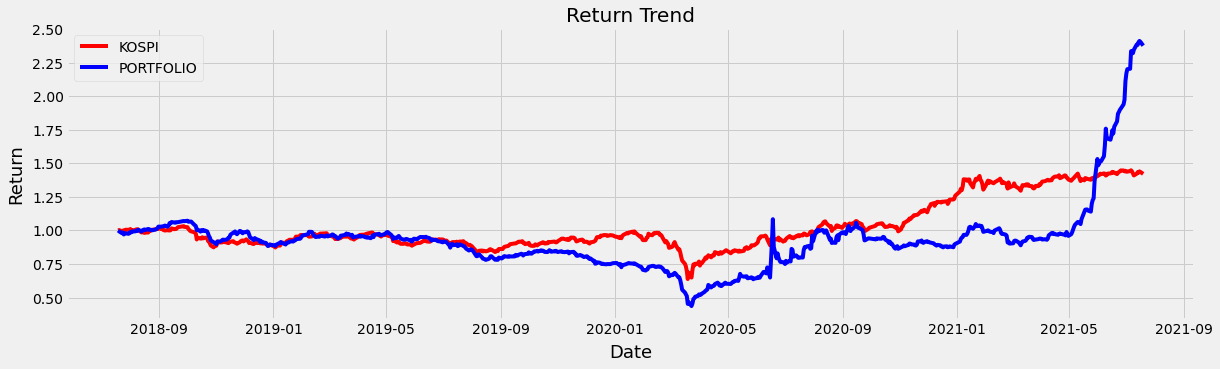

In [70]:
# 포트폴리오와 KOSPI 지수의 '누적 수익률 추이'를 시각화하여 비교

# matplotlib.pyplot 스타일시트 설정
plt.style.use('fivethirtyeight')

plt.figure(figsize=(18,5))
plt.plot(wealth.index, wealth.KOSPI , 'r', label='KOSPI')
plt.plot(wealth.index, wealth.PORTFOLIO ,'b', label="PORTFOLIO")
plt.grid(True)
plt.title('Return Trend')
plt.xlabel('Date',fontsize=18, labelpad=7)
plt.ylabel('Return',fontsize=18, labelpad=7)
plt.legend(loc='best')
plt.show()

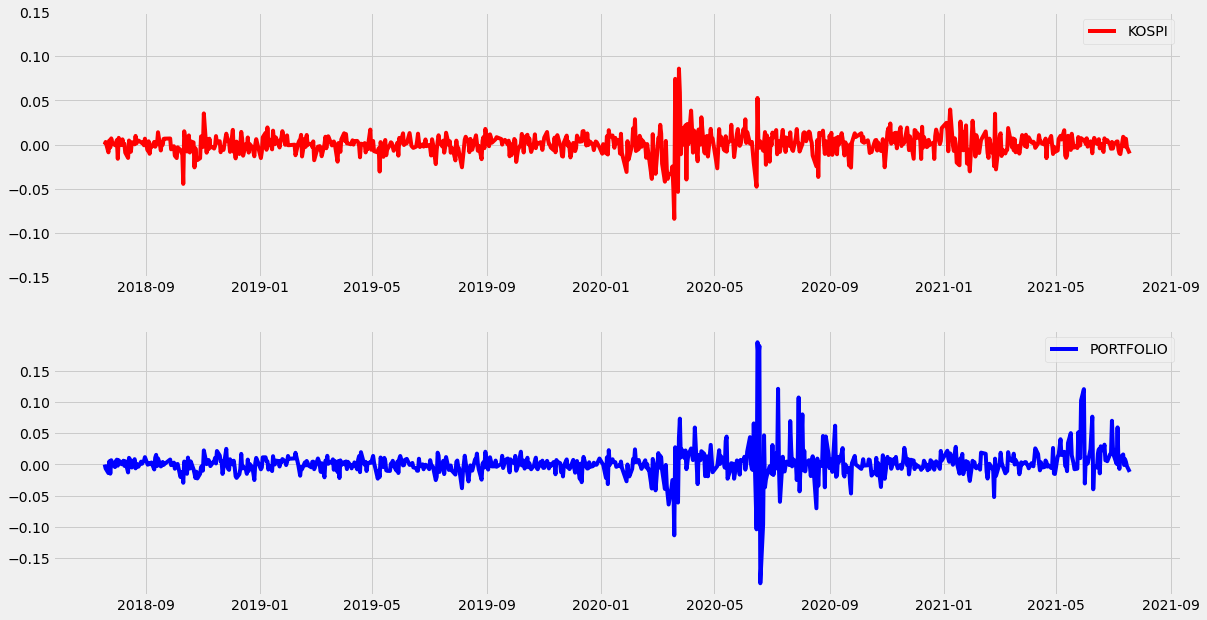

In [71]:
# 변동률 비교
plt.figure(figsize=(18,10))

plt.subplot(2,1,1)
plt.plot(result.index, result.KOSPI , 'r', label='KOSPI')
plt.yticks([-0.15, -0.10, -0.05, 0.00, 0.05, 0.10, 0.15])
plt.grid(True)

plt.legend(loc='best')

plt.subplot(2,1,2)
plt.plot(result.index, result.PORTFOLIO ,'b', label="PORTFOLIO")
plt.yticks([-0.15, -0.10, -0.05, 0.00, 0.05, 0.10, 0.15])
plt.legend(loc='best')

plt.grid(True)
plt.show()

In [73]:
print('----- 3 months momentum portfolio performance -----')
# Show Funds Remaining
print('Funds Remaining: ', leftover, ' KRW')

# Show Portfolio performance
ef.portfolio_performance(verbose=True)

# Show RMSE
# print('Allocation has RMSE: {:.3f}'.format(rmse))

----- 3 months momentum portfolio performance -----
Funds Remaining:  3660.0  KRW
Expected annual return: 65.4%
Annual volatility: 28.0%
Sharpe Ratio: 2.26


(0.6541152088027182, 0.2803010200250025, 2.262265077544691)